# AULA GESTÃO DE RISCO

#    1 - Tipos de retorno

#    2 - Retorno de um portfólio

#    3 - Correlação entre ativos

#    4 - Volatilidade do portfólio

#    5 - Índice Beta e R²

#    6 - índice Sharpe

#    7 - Máximo Drawdown



# 1- Tipos de retorno

In [1]:
# importando as bibliotécas
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
yf.pdr_override()

In [2]:
# baixando os dados da ação e verificando o dataframe

acao = web.get_data_yahoo('IRBR3.SA', start='2022-03-21', end='2022-03-26')

display(acao)

type(acao)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-21,3.02,3.08,2.96,2.99,2.99,14837100
2022-03-22,3.01,3.14,3.01,3.11,3.11,20354600
2022-03-23,3.21,3.27,3.09,3.09,3.09,19690000
2022-03-24,3.10,3.28,3.10,3.24,3.24,25157400
2022-03-25,3.25,3.49,3.24,3.45,3.45,30593500


pandas.core.frame.DataFrame

# especificando a coluna que quer do dataframe


In [17]:
#primeiro caso

acao = pd.DataFrame()
lista_acao = ['IRBR3.SA']

for i in lista_acao:
    acao[i] = web.get_data_yahoo(i, start='2022-03-21', end='2022-03-26')['Adj Close']
    
    
display(acao)
type(acao)

[*********************100%***********************]  1 of 1 completed


,IRBR3.SA
Date,
2022-03-21,2.99
2022-03-22,3.11
2022-03-23,3.09
2022-03-24,3.24
2022-03-25,3.45


pandas.core.frame.DataFrame

In [23]:
#segundo caso 
acao = web.get_data_yahoo('IRBR3.SA', start='2022-03-21', end='2022-03-26')['Adj Close']

acao = pd.DataFrame(acao)

display(acao)

type(acao)

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2022-03-21,2.99
2022-03-22,3.11
2022-03-23,3.09
2022-03-24,3.24
2022-03-25,3.45


pandas.core.frame.DataFrame

In [3]:
#caso faça sem passar a serie para um dataframe
acao = web.get_data_yahoo('IRBR3.SA', start='2022-03-21', end='2022-03-26')['Adj Close']

display(acao)

type(acao)

[*********************100%***********************]  1 of 1 completed


Date
2022-03-21    2.99
2022-03-22    3.11
2022-03-23    3.09
2022-03-24    3.24
2022-03-25    3.45
Name: Adj Close, dtype: float64

pandas.core.series.Series

# Calculando os retornos

# Retorno Linear

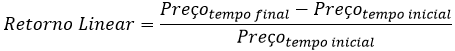

In [30]:
# calculando o retorno linear

# OBS: O .diff() é uma função da biblioteca pandas que faz a diferença 
#      entre o preço futuro e o preço passado no período especificado


#      O .shift() também é uma função do pandas e desloca todo o dataframe 
#      na quantidade de dias especificado


acao = pd.DataFrame()
lista_acao = ['IRBR3.SA']

for i in lista_acao:
    acao[i] = web.get_data_yahoo(i, start='2022-03-21', end='2022-03-26')['Adj Close']
    

retornos = acao.diff(1)/acao.shift(1) *100
retornos

[*********************100%***********************]  1 of 1 completed


,IRBR3.SA
Date,
2022-03-21,NaN
2022-03-22,4.013374
2022-03-23,-0.643086
2022-03-24,4.854372
2022-03-25,6.481483


# Log Retorno

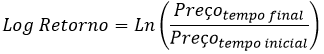

In [35]:
# OBS: no calculo do retorno LOG é utilizado o retorno com o LN (log natural)
#  na biblioteca numpy o np.log() é o log natural do ativo especificado

acao = pd.DataFrame()
lista_acao = ['IRBR3.SA']

for i in lista_acao:
    acao[i] = web.get_data_yahoo(i, start='2022-03-21', end='2022-03-26')['Adj Close']
    

retornos = np.log(acao/acao.shift(1))
retornos*100

[*********************100%***********************]  1 of 1 completed


,IRBR3.SA
Date,
2022-03-21,NaN
2022-03-22,3.934930
2022-03-23,-0.645163
2022-03-24,4.740227
2022-03-25,6.280091


# Retorno linear acumulado

In [56]:
# calculando o retorno linear acumulado

# o .iloc[] localiza um elemento na lista de acordo com o índice especificado, nesse caso
# o especificado foi -1 e 0, -1 é o último número das linhas do data frame e o 0 é o primeiro
# número da lista

acao = pd.DataFrame()
lista_acao = ['IRBR3.SA']

for i in lista_acao:
    acao[i] = web.get_data_yahoo(i, start='2022-03-21', end='2022-03-26')['Adj Close']
    

retorno = acao.iloc[-1]/acao.iloc[0] - 1
retorno*100

[*********************100%***********************]  1 of 1 completed


IRBR3.SA    15.384617
dtype: float64

# Retorno de um portfólio

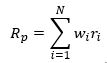

In [8]:
#pegando as ações que desaja calcular 

# o np.dot()  realiza o produto escalar entre dois vetores ou matrizez, faz parte da biblioteca numpy


acao = pd.DataFrame()
lista_acao = ['IRBR3.SA', 'MGLU3.SA']

for i in lista_acao:
    acao[i] = web.get_data_yahoo(i, start='2022-03-21', end='2022-03-26')['Adj Close']
    

    
pesos = [70/100, -10/100]

retorno_b = acao['IRBR3.SA'].iloc[-1]/acao['IRBR3.SA'].iloc[0] - 1
retorno_a = acao['MGLU3.SA'].iloc[-1]/acao['MGLU3.SA'].iloc[0] - 1


retornos = [retorno_a, retorno_b]


ret = np.dot(pesos, retornos)

print(ret*100)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
8.496505842660175


# CORRELAÇÃO DE ATIVOS

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


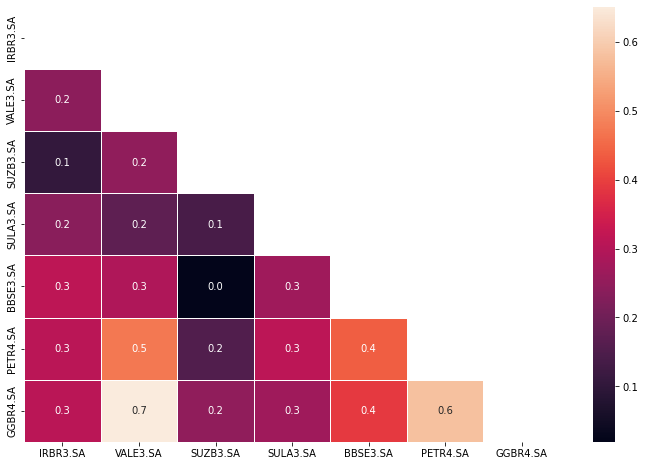

In [3]:
# achando a matriz de correlação entre os retornos


acao = pd.DataFrame()
lista_acao = ['IRBR3.SA','VALE3.SA','SUZB3.SA','SULA3.SA','BBSE3.SA','PETR4.SA','GGBR4.SA']

for i in lista_acao:
    acao[i] = web.get_data_yahoo(i, start='2017-03-21', end='2022-01-01')['Adj Close']
    
    
retorno = np.log(acao/acao.shift(1))
    
correlacao = retorno.corr()

mask = np.triu(correlacao)
plt.figure(figsize=(12,8))
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.9, mask= mask)

    



### RISCO DO PORTFÓLIO

In [2]:
# achando o risco de um portfólio 

acao = pd.DataFrame()
lista_acao = ['IRBR3.SA','VALE3.SA','SUZB3.SA','SULA3.SA','BBSE3.SA','PETR4.SA','GGBR4.SA']

for ticker in lista_acao:
    acao[ticker] = web.get_data_yahoo(ticker, start='2017-03-21', end='2022-01-01')['Adj Close']
    
    
pesos = np.array([0.10,0.20,0.05,0.25,0.10,0.15,0.15])
cov = acao.pct_change().dropna().cov()   #pct_change >>> acao.diff()/acao.shift(1)
risk = np.sqrt(np.dot(pesos.T,np.dot(cov*252,pesos)))
risk = np.around(risk,3)
print("")
print("")
print(f"O risco anualizado do portfólio é de: {risk*100}% ")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


O risco anualizado do portfólio é de: 31.0% 


### BETA E R² DE UM ATIVO

In [7]:
# achando o beta e o r² do ativo

acao_close = pd.DataFrame()

acao_ticker = ['IRBR3.SA','^BVSP']
start = '2017-01-01'
end = '2022-01-01'
for i in acao_ticker:
    acao_close[i] = web.get_data_yahoo(i, start=start, end= end)['Adj Close']
    
ret_irbr = acao_close['IRBR3.SA'].pct_change().dropna()
ret_bvsp = acao_close['^BVSP'].pct_change().dropna()

beta,alfa,r_value, p_value, std = stats.linregress(ret_bvsp,ret_irbr)

print("")
print(f"O beta do ativo é: {np.around(beta,2)}")
print("")
print(f"O r² do ativo é: {np.around(r_value**2,2)}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

O beta do ativo é: 0.94

O r² do ativo é: 0.2


### Índice Sharpe

In [59]:
#calculando o índice sharpe do portfólio

acao = pd.DataFrame()
lista_acao = ['IRBR3.SA','VALE3.SA','SUZB3.SA','SULA3.SA','BBSE3.SA','PETR4.SA','GGBR4.SA']

for ticker in lista_acao:
    acao[ticker] = web.get_data_yahoo(ticker, start='2017-03-21', end='2022-01-01')['Adj Close']
    
#RISCO
pesos = np.array([0.10,0.20,0.05,0.25,0.10,0.15,0.15])
cov = acao.pct_change().dropna().cov()   #pct_change >>> acao.diff()/acao.shift(1)
risk = np.sqrt(np.dot(pesos.T,np.dot(cov*252,pesos)))
risk = np.around(risk,3)

#RETORNO
ret = acao.pct_change().dropna()
ret_anual = np.dot(pesos.T,ret.mean()*252)



#tiirando o sharpe

Rp = ret_anual
Rf = 0.11 
std = risk
IS = (Rp - Rf)/std


print("")
print(f'Sharpe: {round(IS,2)}')
print("")
print(f'Retorno: {round(ret_anual,3)*100}%')
print("")
print(f'Risco: {risk*100}%')
print("")
print(f"Taxa livre de risco: {Rf*100}%")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sharpe: 0.54

Retorno: 27.6%

Risco: 31.0%

Taxa livre de risco: 11.0%


### Máximo Drawdown


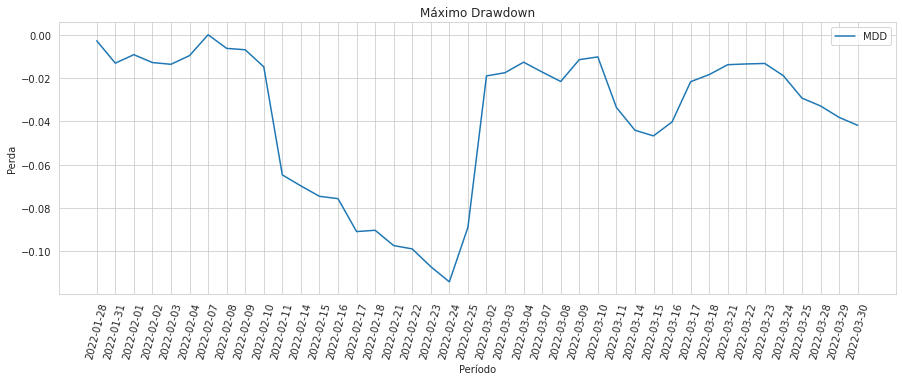


MDD: -12.87%



In [6]:
# máximo drawdown de um fundo fictício e platando um gráfico de MDD

data = ['2022-01-28','2022-01-31','2022-02-01' ,'2022-02-02' ,'2022-02-03' ,'2022-02-04' ,'2022-02-07','2022-02-08','2022-02-09' ,'2022-02-10' ,'2022-02-11','2022-02-14' ,'2022-02-15' ,'2022-02-16' ,'2022-02-17' ,'2022-02-18' ,'2022-02-21' ,'2022-02-22','2022-02-23' ,'2022-02-24' ,'2022-02-25' ,'2022-03-02','2022-03-03' ,'2022-03-04' ,'2022-03-07' ,'2022-03-08' ,'2022-03-09' ,'2022-03-10' ,'2022-03-11' ,'2022-03-14' ,'2022-03-15' ,'2022-03-16' ,'2022-03-17' ,'2022-03-18' ,'2022-03-21' ,'2022-03-22' ,'2022-03-23' ,'2022-03-24','2022-03-25', '2022-03-28' ,'2022-03-29' ,'2022-03-30']

cota = [100000000,98964186.5748459,99357346.8573531,98991808.2311405,98912325.7408773,99314227.5128418,100279877.59814,99648567.4506509,99584201.2212929,98795584.6701776,93791173.1226747,93282643.6236285,92801252.5932106,92692796.4359494,91168538.6246551,91228616.9355914,90520361.4374034,90366621.1242747,89542939.2558828,88842004.2422855,91368651.5786706,98373378.1937478,98522973.3924275,99009593.2700239,98553521.8858813,98116135.4032504,99127135.899908,99253927.3994497,96916743.451318,95859300.2179089,95598411.754672,96244178.119005,98105864.1553051,98435439.6136114,98893706.4722991,98927701.4579474,98949670.8189332,98381091.2831234,97345712.9438565,96983705.7035926,96454868.7365375,96086597.7442784]

df = pd.DataFrame({'Data':data, 'cota':cota}).set_index('Data')

mdd_plot = df/df.max() -1

mdd = round((df['cota'].max()/df['cota'].min() - 1)*100,2)


sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.plot(mdd_plot,label='MDD')
plt.legend()
plt.title("Máximo Drawdown")
plt.xlabel('Período')
plt.ylabel('Perda')
plt.xticks(rotation=75)
plt.show()

print("")
print(f"MDD: -{mdd}%")
print("")

#essa parte do código precisa melhorar, pois com um conjunto maior de dados fica ruim de verificar qual foi
#o máximo drawdown do período, pois sempre vai pegar o máximo e dividir pelo mínimo. Dependendo da janela
#de tempo que precisar, precisará utilizar outros métodos como o .rolling() do pandas. 